# Heart Disease Predictor

In [1]:
#importing required libraries and classes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
#reading the data from a csv file
df=pd.read_csv('heart.csv')
df.head()#prints data inide dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()#getting info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
df.isnull().sum()#checking the total number of null values in each column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()#describing all colums

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df[['target', 'sex']].groupby(['sex'], as_index=False).mean()#cheching the average of male and females having heart disease

,sex,target
0,0,0.750000
1,1,0.449275


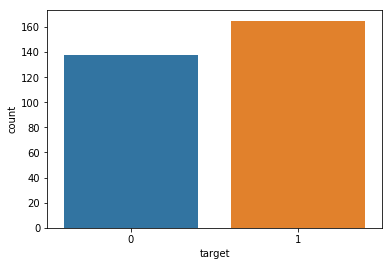

In [7]:
sns.countplot(x='target',data=df)#plotting the number of persons having target 0 and 1

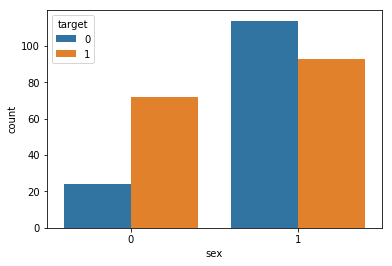

In [8]:
sns.countplot(x="sex",hue="target",data=df)#plotting the number of females and males having heart disease and not having the disease

In [9]:
df['AgeBand'] = pd.cut(df['age'],5) #categorising age into 5 groups

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeBand
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(57.8, 67.4]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(28.952, 38.6]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(38.6, 48.2]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(48.2, 57.8]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(48.2, 57.8]"


In [11]:
df[['AgeBand','target']].groupby('AgeBand', as_index=False).mean()#calculating average of people target in each age group

,AgeBand,target
0,"(28.952, 38.6]",0.750000
1,"(38.6, 48.2]",0.704225
2,"(48.2, 57.8]",0.577320
3,"(57.8, 67.4]",0.377358
4,"(67.4, 77.0]",0.588235


In [12]:
#replacing the age value with the number assigned to the age group for eg: if person is between age 28-38 he belongs to group 1 and so on
df.loc[ df['age'] <= 28, 'age'] = 0
df.loc[(df['age'] > 28) & (df['age'] <= 38),'age']= 1
df.loc[(df['age'] > 38) & (df['age'] <= 48),'age']= 2
df.loc[(df['age'] > 48) & (df['age'] <= 58),'age']= 3
df.loc[(df['age'] > 58) & (df['age'] <= 68),'age']= 4
df.loc[(df['age'] > 68) & (df['age'] <= 78),'age']= 5


In [13]:
df.head()#printing the dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeBand
0,4,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(57.8, 67.4]"
1,1,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(28.952, 38.6]"
2,2,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(38.6, 48.2]"
3,3,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(48.2, 57.8]"
4,3,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(48.2, 57.8]"


In [14]:
df.drop(labels='AgeBand', axis=1, inplace=True)#removing ageband column from table

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,4,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,3,0,0,120,354,0,1,163,1,0.6,2,0,2,1


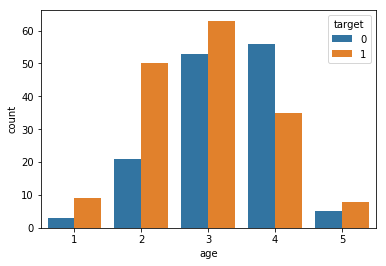

In [16]:
sns.countplot(x="age",hue="target",data=df)#trget veses age band plot

In [17]:
df[['age','target']].groupby('age', as_index=False).mean()#CHECKING MEAN OF TARGET VALUE FOR EACH AGE GROUP

,age,target
0,1,0.750000
1,2,0.704225
2,3,0.543103
3,4,0.384615
4,5,0.615385


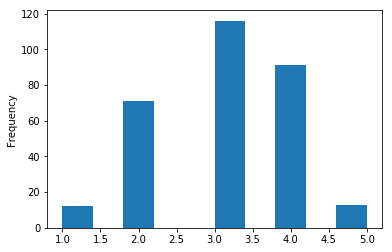

In [18]:
df['age'].plot.hist()# PLOTTING THE HISTOGRAM OF AGE

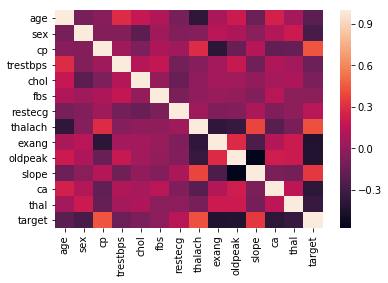

In [19]:
sns.heatmap(df.corr())#DRAWING HEAT MAP OF CORRELTION MATRIX
plt.show()

In [20]:
df.corr()#PRINTNG HEATMAP OF CORRELATION MATRIX

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.099704,-0.038954,0.293454,0.180612,0.107446,-0.099121,-0.376944,0.082067,0.210468,-0.143427,0.247424,0.064661,-0.207166
sex,-0.099704,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.038954,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.293454,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.180612,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.107446,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.099121,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.376944,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.082067,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210468,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [21]:
#Standardising data
sc=StandardScaler()
columns=['age','trestbps','chol','thalach','oldpeak']
df[columns]=sc.fit_transform(df[columns])

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.000374,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-2.235711,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.157016,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,-0.078321,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,-0.078321,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [23]:
#DIVIDING DATA INTO LABEL AND FEATURES
y=df['target']
x=df.drop(['target'],axis=1)

In [24]:
#DIVIDING DATA INTO TRAIN AND TEST DATA TESTING %=20%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
x_train#PRINTING X_TRAIN

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,-1.157016,0,2,-0.549641,-0.642843,0,1,0.671400,0,-0.724323,1,0,2
153,1.000374,0,2,0.821069,0.613313,0,0,0.102904,0,-0.896862,1,1,2
64,-0.078321,1,2,0.478391,-0.681494,1,0,0.671400,0,-0.896862,2,0,2
296,1.000374,0,0,-0.435415,-0.952051,0,1,-0.596784,1,-0.896862,1,0,2
287,-0.078321,1,1,1.277972,-0.275659,0,0,0.627670,0,-0.896862,2,1,2
286,1.000374,1,3,0.135714,-0.816773,0,1,0.540209,0,-0.206705,2,2,2
236,-0.078321,1,0,-0.378302,1.038474,0,0,0.933783,0,-0.896862,2,2,3
126,-1.157016,1,0,-1.120770,-0.816773,0,1,-0.290671,0,-0.810592,2,0,2
73,-0.078321,1,0,0.478391,0.284780,0,0,1.589741,1,-0.896862,2,0,2
20,1.000374,1,0,0.192827,-0.237008,0,1,0.496478,0,-0.465514,1,0,3


In [26]:
y_train#PRINTING Y_TRAIN

74     1
153    1
64     1
296    0
287    0
286    0
236    0
126    1
73     1
20     1
46     1
160    1
232    0
181    0
27     1
173    0
261    0
37     1
101    1
166    0
233    0
184    0
164    1
206    0
248    0
253    0
293    0
76     1
272    0
238    0
      ..
147    1
278    0
177    0
99     1
197    0
243    0
115    1
265    0
72     1
25     1
165    0
289    0
174    0
291    0
39     1
193    0
88     1
70     1
87     1
292    0
242    0
277    0
211    0
9      1
195    0
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 242, dtype: int64

# LOGISTIC REGRESSION

In [27]:

lr=LogisticRegression()#CREATING CLASS
lr.fit(x_train,y_train)#FITTING MODEL

D:\Conda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lr_predict=lr.predict(x_test)#PREDICTING LABEL

In [29]:
#CALCULATING ACCUACY
accuracy_score(y_test,lr_predict)

0.8524590163934426

# NAIVE BAYES

In [30]:

nv=GaussianNB()
nv.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
nv_pred=nv.predict(x_test)

In [32]:
accuracy_score(y_test,nv_pred)

0.8524590163934426

In [33]:
confusion_matrix(y_test,nv_pred)

array([[22,  5],
       [ 4, 30]], dtype=int64)

# SUPPORT VECTOR MACHINE

In [34]:

clf=SVC(kernel='linear')
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
clf_pred=clf.predict(x_test)

In [36]:
accuracy_score(y_test,clf_pred)

0.819672131147541

In [37]:
confusion_matrix(y_test,clf_pred)

array([[20,  7],
       [ 4, 30]], dtype=int64)

# DECISION TREE CLASSIFIER

In [38]:

model=DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [39]:
dt_pred=model.predict(x_test)

In [40]:
accuracy_score(y_test,dt_pred)

0.7377049180327869

In [41]:
confusion_matrix(y_test,dt_pred)

array([[22,  5],
       [11, 23]], dtype=int64)

# RANDOM FOREST CLASSIFIER

In [42]:

rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)

In [43]:
accuracy_score(y_test,rfc_pred)

0.8688524590163934

In [44]:
confusion_matrix(y_test,rfc_pred)

array([[23,  4],
       [ 4, 30]], dtype=int64)